<a href="https://www.kaggle.com/code/ivyfiecas/market-demand-prediction-for-filipino-emigrants?scriptVersionId=197762285" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Load the dataset

In [1]:
import os

# List all files and directories in the /kaggle/input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(f"Directory: {dirname}")
    for filename in filenames:
        print(f" - {filename}")


Directory: /kaggle/input
Directory: /kaggle/input/demographics-of-filipino-emmigrants-2015-2020
 - emigration_dataset.csv


In [2]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/kaggle/input/demographics-of-filipino-emmigrants-2015-2020/emigration_dataset.csv')

# Display the first few rows of the dataset
df.head()


,year,gender,major_country,civil_status,age_group,educ_status,occupation_group,job_class,region,province,city_complete
0,2020,MALE,USA,Single,14 - Below,Not of Schooling Age,EMPLOYED,"Prof'l, Tech'l, & Related Workers",Region I - Ilocos Region,ILOCOS NORTE,"ADAMS, (ILOCOS NORTE)"
1,2020,MALE,USA,Single,14 - Below,Not of Schooling Age,EMPLOYED,"Prof'l, Tech'l, & Related Workers",Region I - Ilocos Region,ILOCOS NORTE,"ADAMS, (ILOCOS NORTE)"
2,2020,MALE,USA,Single,14 - Below,Not of Schooling Age,EMPLOYED,"Prof'l, Tech'l, & Related Workers",Region I - Ilocos Region,ILOCOS NORTE,"ADAMS, (ILOCOS NORTE)"
3,2020,MALE,USA,Single,14 - Below,Not of Schooling Age,EMPLOYED,"Prof'l, Tech'l, & Related Workers",Region I - Ilocos Region,ILOCOS NORTE,"BACARRA, (ILOCOS NORTE)"
4,2020,MALE,USA,Single,14 - Below,Not of Schooling Age,EMPLOYED,"Prof'l, Tech'l, & Related Workers",Region I - Ilocos Region,ILOCOS NORTE,"BACARRA, (ILOCOS NORTE)"


# Exploratory Data Analysis (EDA)

# Handling missing values

In [3]:
missing = df.isnull().sum()
print(missing)

year                   0
gender                 0
major_country          0
civil_status        4015
age_group              0
educ_status            0
occupation_group       0
job_class              0
region               288
province             288
city_complete        288
dtype: int64


In [4]:
# Fill missing values in 'civil_status' column by reassigning the result
df['civil_status'] = df['civil_status'].fillna('Not Reported')

# Fill missing values in the entire DataFrame with 0
df.fillna(0, inplace=True)


# Fill missing values in 'region', 'province', and 'city_complete' with 'Not Reported'
df.fillna({
    'region': 'Not Reported',
    'province': 'Not Reported',
    'city_complete': 'Not Reported'
}, inplace=True)


missing = df.isnull().sum()
print(missing)

year                0
gender              0
major_country       0
civil_status        0
age_group           0
educ_status         0
occupation_group    0
job_class           0
region              0
province            0
city_complete       0
dtype: int64


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323719 entries, 0 to 323718
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   year              323719 non-null  int64 
 1   gender            323719 non-null  object
 2   major_country     323719 non-null  object
 3   civil_status      323719 non-null  object
 4   age_group         323719 non-null  object
 5   educ_status       323719 non-null  object
 6   occupation_group  323719 non-null  object
 7   job_class         323719 non-null  object
 8   region            323719 non-null  object
 9   province          323719 non-null  object
 10  city_complete     323719 non-null  object
dtypes: int64(1), object(10)
memory usage: 27.2+ MB


# Understanding of Data

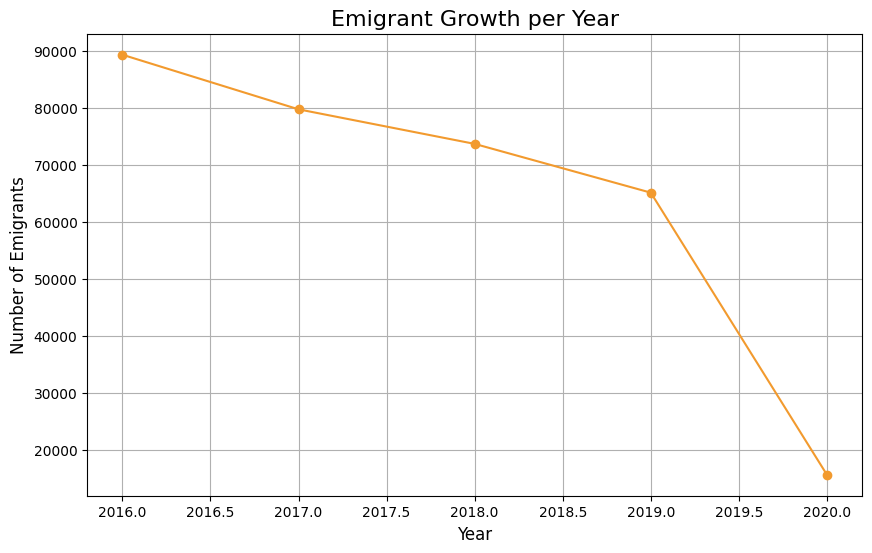

In [6]:
import matplotlib.pyplot as plt

# Assuming 'year' and 'emigrant_count' are columns in your dataframe
# If you don't have an explicit 'emigrant_count' column, you can count occurrences of emigrants per year
emigrant_growth = df.groupby('year').size()

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Plot the emigrant growth per year (line plot)
plt.plot(emigrant_growth.index, emigrant_growth.values, marker='o', linestyle='-', color='#F29A2E')

# Add titles and labels
plt.title('Emigrant Growth per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Emigrants', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()


# Distribution of Gender

/tmp/ipykernel_17/399317464.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(f'{p.get_height()} ({percentages[i]:.2f}%)',


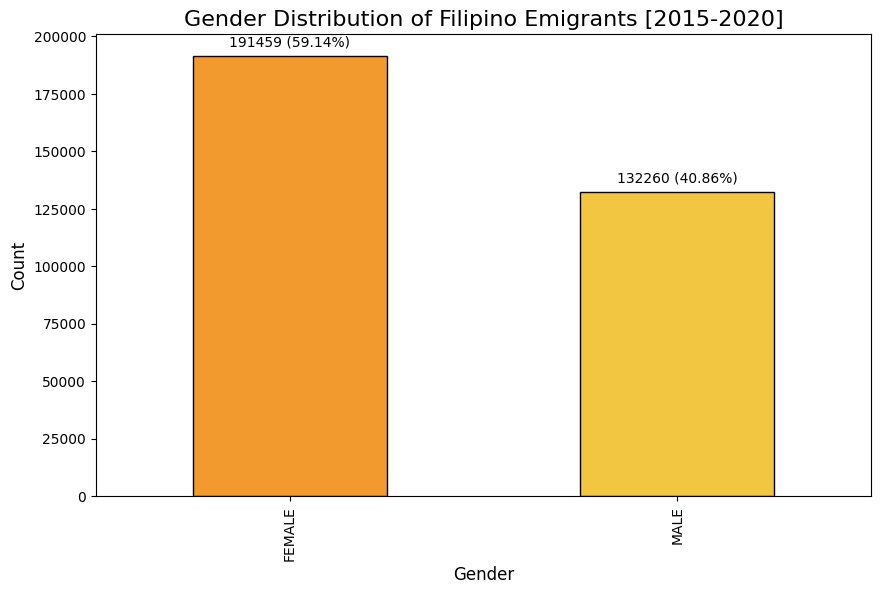

In [7]:
# Ensure plots display inside the notebook
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


# Get the count of each gender
gender_distribution = df['gender'].value_counts()

# Create a figure with a specific size
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Define the custom colors
custom_colors = ['#F29A2E', '#F2C641', '#F2E8E4', '#D9653B']

# Plot the distribution of gender with custom colors
ax = gender_distribution.plot(kind='bar', color=custom_colors[:len(gender_distribution)], edgecolor='black')

# Add titles and labels
plt.title('Gender Distribution of Filipino Emigrants [2015-2020]', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Calculate percentages
total = gender_distribution.sum()
percentages = (gender_distribution / total) * 100

# Add percentage labels on top of each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height()} ({percentages[i]:.2f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


# Distribution of Age Groups

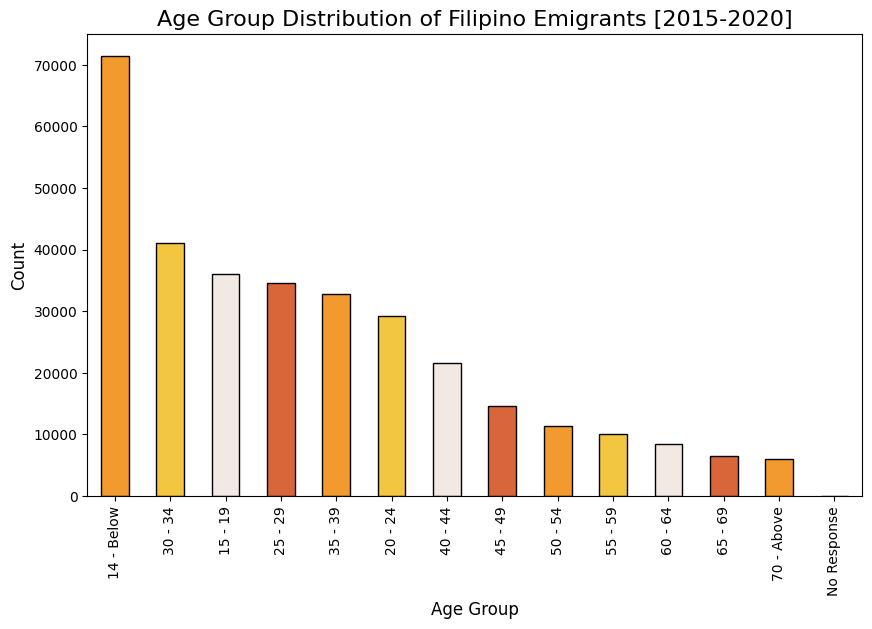

In [8]:
# Ensure plots display inside the notebook
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Get the count of each age group
age_group_distribution = df['age_group'].value_counts()

# Create a figure with a specific size
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Define the custom colors
custom_colors = ['#F29A2E', '#F2C641', '#F2E8E4', '#D9653B']

# Plot the distribution of age groups with custom colors
ax = age_group_distribution.plot(kind='bar', color=custom_colors[:len(age_group_distribution)], edgecolor='black')

# Add titles and labels
plt.title('Age Group Distribution of Filipino Emigrants [2015-2020]', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot without text annotations
plt.show()


# Key Country Destination Distribution

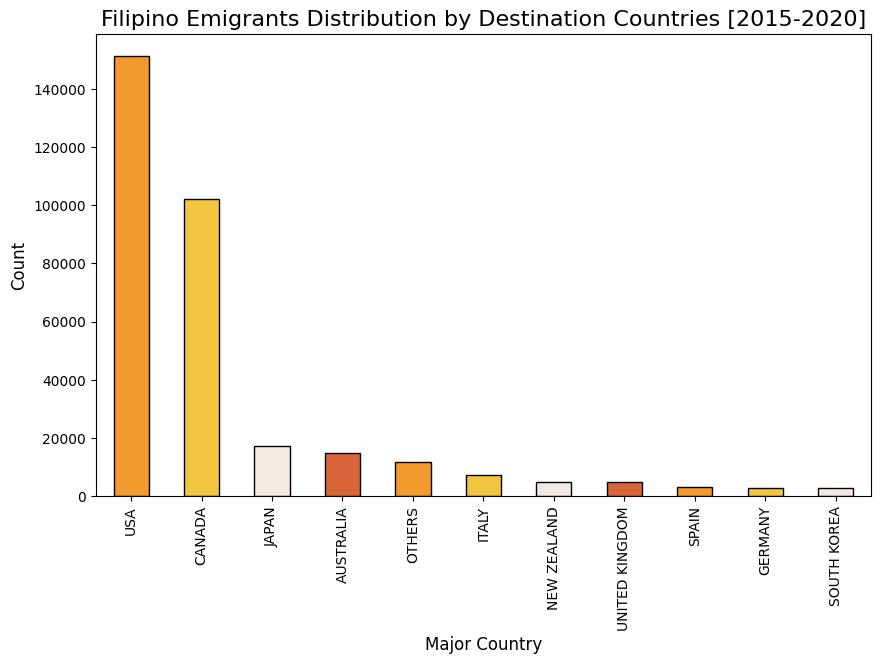

In [9]:
# Ensure plots display inside the notebook
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Get the count of OFWs in each major country
major_country_distribution = df['major_country'].value_counts()

# Create a figure with a specific size
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Define custom colors
custom_colors = ['#F29A2E', '#F2C641', '#F2E8E4', '#D9653B']

# Plot the distribution of OFWs by major country with custom colors
ax = major_country_distribution.plot(kind='bar', color=custom_colors[:len(major_country_distribution)], edgecolor='black')

# Add titles and labels
plt.title('Filipino Emigrants Distribution by Destination Countries [2015-2020]', fontsize=16)
plt.xlabel('Major Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot without text annotations
plt.show()


# Education Status Distribution

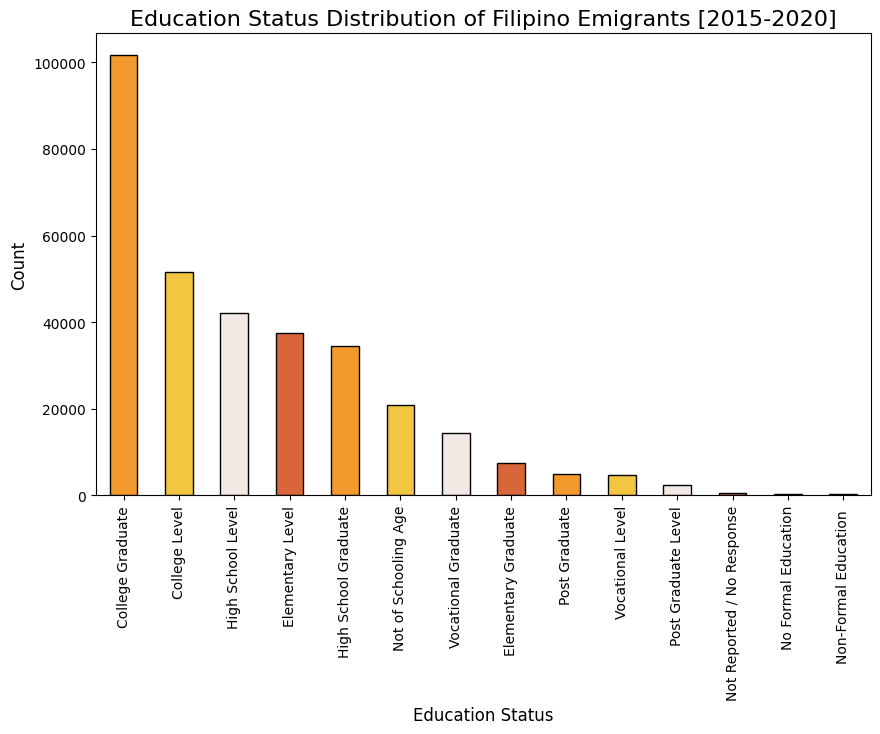

In [10]:
# Ensure plots display inside the notebook
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


# Get the count of each education status
educ_status_distribution = df['educ_status'].value_counts()

# Create a figure with a specific size
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Define custom colors
custom_colors = ['#F29A2E', '#F2C641', '#F2E8E4', '#D9653B']

# Plot the distribution of education status with custom colors
ax = educ_status_distribution.plot(kind='bar', color=custom_colors[:len(educ_status_distribution)], edgecolor='black')

# Add titles and labels
plt.title('Education Status Distribution of Filipino Emigrants [2015-2020]', fontsize=16)
plt.xlabel('Education Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot without text annotations
plt.show()


# Job Sector Distribution

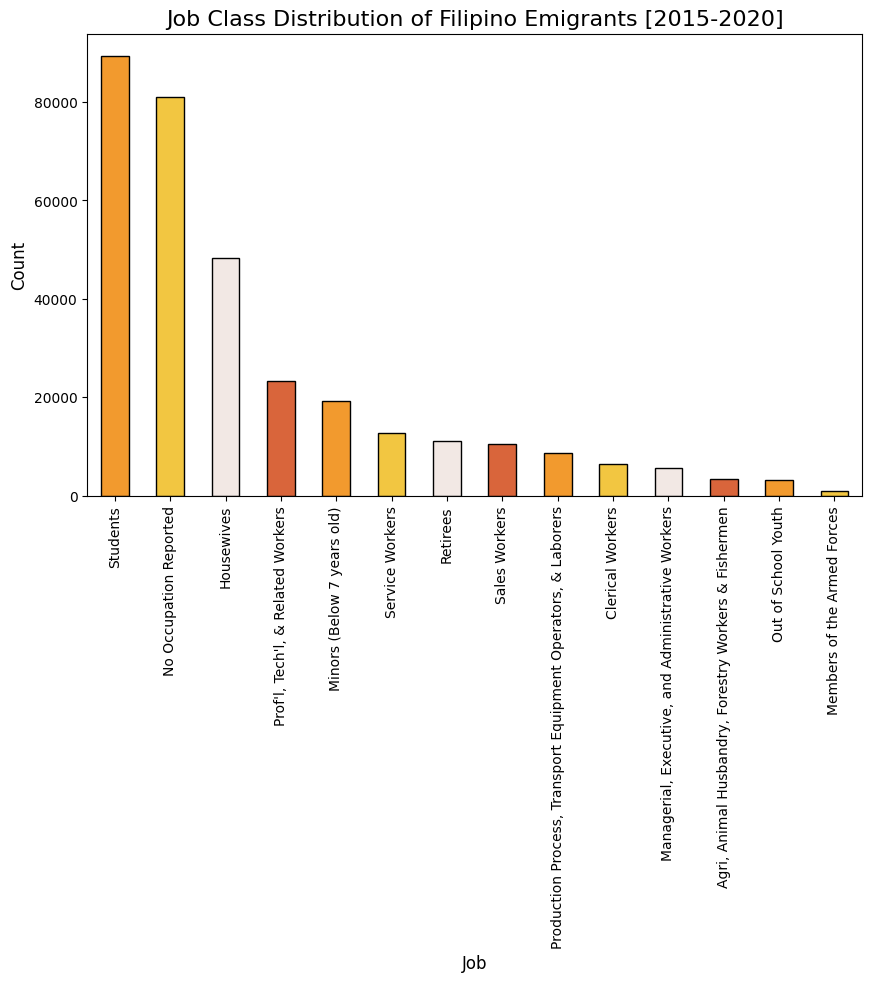

In [11]:
# Ensure plots display inside the notebook
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


# Get the distribution of jobs
job_distribution = df['job_class'].value_counts()

# Create a figure with a specific size
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Define custom colors
custom_colors = ['#F29A2E', '#F2C641', '#F2E8E4', '#D9653B']

# Plot the distribution of jobs with custom colors
ax = job_distribution.plot(kind='bar', color=custom_colors[:len(job_distribution)], edgecolor='black')

# Add titles and labels
plt.title('Job Class Distribution of Filipino Emigrants [2015-2020]', fontsize=16)
plt.xlabel('Job', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot without text annotations
plt.show()


# Origin of Filipino Emigrants by Region

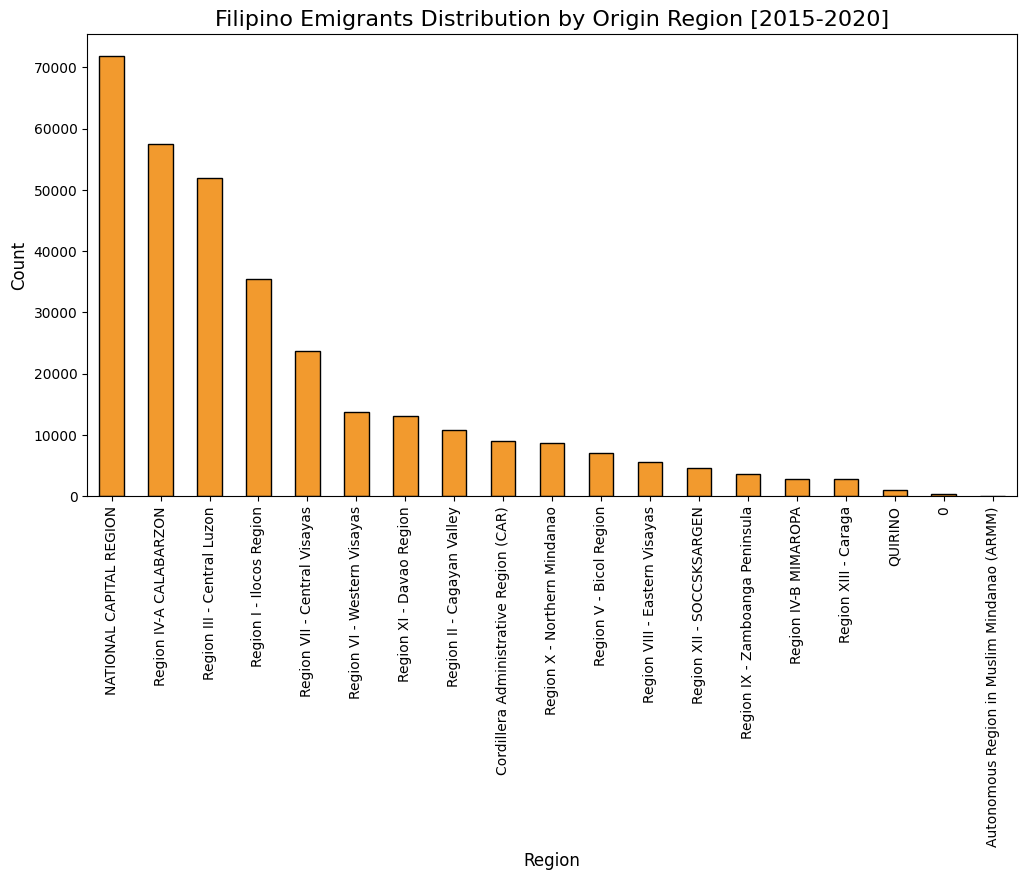

In [12]:
# Get the count of OFWs by region
region_distribution = df['region'].value_counts()

# Plot the distribution of regions
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
region_distribution.plot(kind='bar', color='#F29A2E', edgecolor='black')

# Add titles and labels
plt.title('Filipino Emigrants Distribution by Origin Region [2015-2020]', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


# Province Distribution

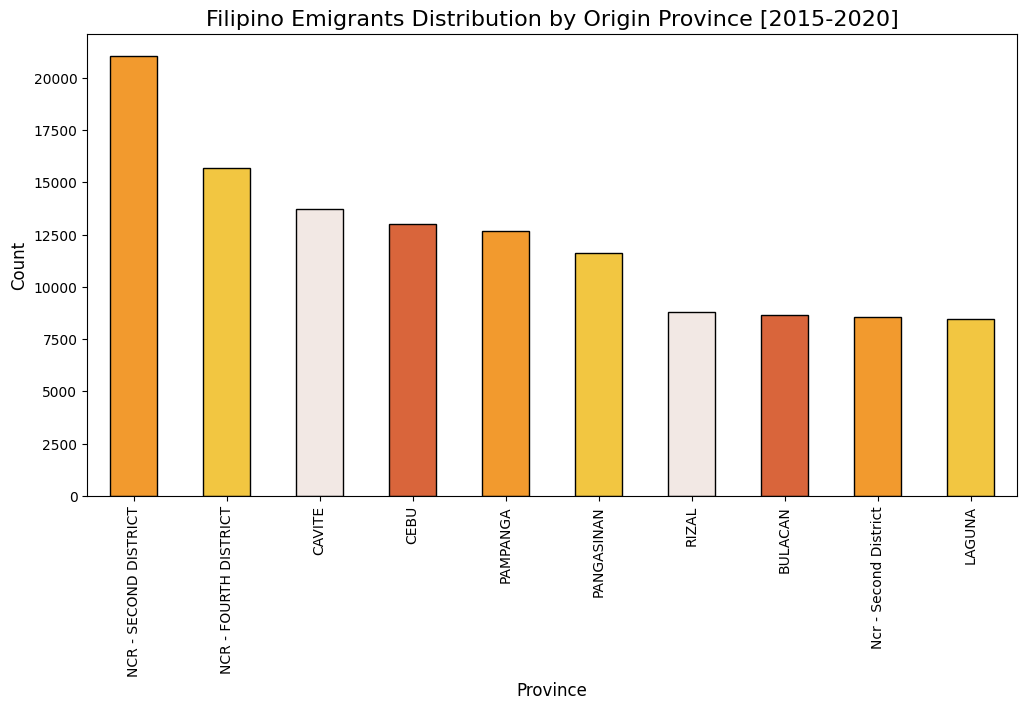

In [13]:
import matplotlib.pyplot as plt

# Get the count of OFWs by province and select the top 10
province_distribution = df['province'].value_counts().nlargest(10)

# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Define custom colors
custom_colors = ['#F29A2E', '#F2C641', '#F2E8E4', '#D9653B']

# Plot the distribution of top 10 provinces with custom colors (cycle through the colors)
province_distribution.plot(kind='bar', color=custom_colors, edgecolor='black')

# Add titles and labels
plt.title('Filipino Emigrants Distribution by Origin Province [2015-2020]', fontsize=16)
plt.xlabel('Province', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


# Top Origin Citites

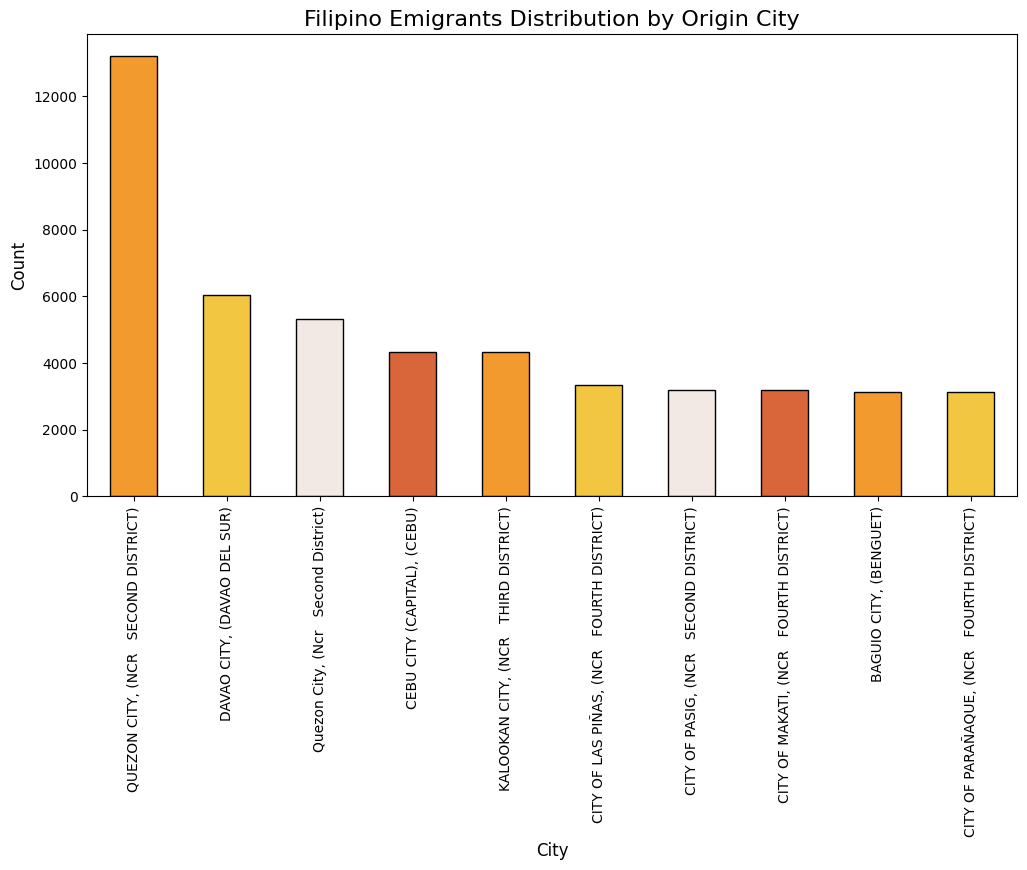

In [14]:
import matplotlib.pyplot as plt

# Get the count of OFWs by city and select the top 10
city_distribution = df['city_complete'].value_counts().nlargest(10)

# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Define custom colors
custom_colors = ['#F29A2E', '#F2C641', '#F2E8E4', '#D9653B']

# Plot the distribution of top 10 cities with custom colors (cycle through the colors)
city_distribution.plot(kind='bar', color=custom_colors, edgecolor='black')

# Add titles and labels
plt.title('Filipino Emigrants Distribution by Origin City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


# Job Class by Destination Country

In [15]:
import pandas as pd

# Group the data by 'major_country' and get the count of each 'job_class'
job_class_per_country = df.groupby('major_country')['job_class'].value_counts().unstack().fillna(0)

# Display the result
print(job_class_per_country)


job_class       Agri, Animal Husbandry, Forestry Workers & Fishermen  \
major_country                                                          
AUSTRALIA                                                     0.0      
CANADA                                                        0.0      
GERMANY                                                       0.0      
ITALY                                                         0.0      
JAPAN                                                         0.0      
NEW ZEALAND                                                   0.0      
OTHERS                                                        0.0      
SOUTH KOREA                                                   0.0      
SPAIN                                                         0.0      
UNITED KINGDOM                                                0.0      
USA                                                        3467.0      

job_class       Clerical Workers  Housewives  \
major_country  

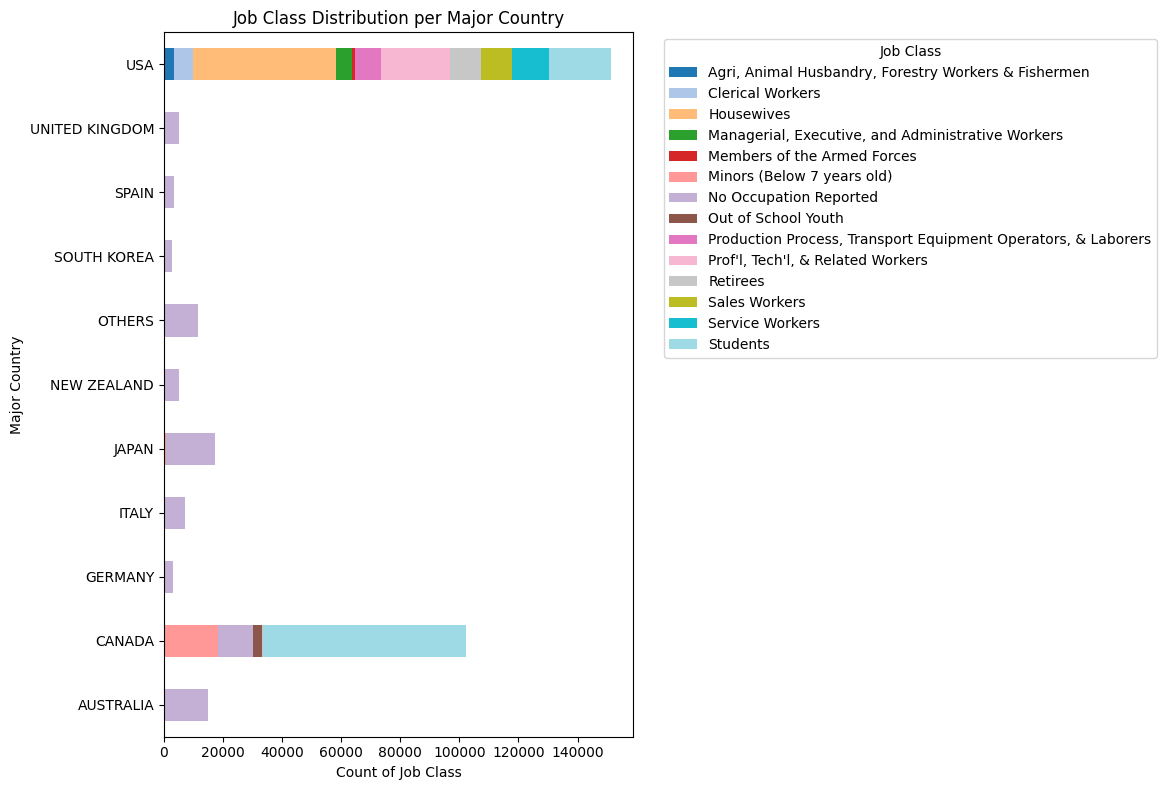

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you've already grouped and unstacked the data
job_class_per_country = df.groupby('major_country')['job_class'].value_counts().unstack().fillna(0)

# Plot a horizontal stacked bar chart
job_class_per_country.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Job Class Distribution per Major Country')
plt.ylabel('Major Country')  # Changed from xlabel to ylabel for horizontal bars
plt.xlabel('Count of Job Class')
plt.legend(title='Job Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [17]:
# Find unique values in the 'educ_status' column
unique_education_status = df['educ_status'].unique()
print(unique_education_status)


['Not of Schooling Age' 'No Formal Education' 'Elementary Level'
 'Elementary Graduate' 'High School Level' 'High School Graduate'
 'Vocational Level' 'Vocational Graduate' 'College Level'
 'College Graduate' 'Post Graduate Level' 'Post Graduate'
 'Non-Formal Education ' 'Not Reported / No Response']


In [18]:
# Find unique values in the 'educ_status' column
unique_education_status = df['age_group'].unique()
print(unique_education_status)


['14 - Below' '15 - 19' '20 - 24' '25 - 29' '30 - 34' '35 - 39' '40 - 44'
 '45 - 49' '50 - 54' '55 - 59' '60 - 64' '65 - 69' '70 - Above'
 'No Response']


In [19]:
# Find unique values in the 'educ_status' column
unique_education_status = df['job_class'].unique()
print(unique_education_status)

["Prof'l, Tech'l, & Related Workers"
 'Managerial, Executive, and Administrative Workers' 'Clerical Workers'
 'Sales Workers' 'Service Workers'
 'Agri, Animal Husbandry, Forestry Workers & Fishermen'
 'Production Process, Transport Equipment Operators, & Laborers'
 'Members of the Armed Forces' 'Housewives' 'Retirees' 'Students'
 'Minors (Below 7 years old)' 'Out of School Youth'
 'No Occupation Reported']


In [20]:
# Find unique values in the 'educ_status' column
unique_education_status = df['occupation_group'].unique()
print(unique_education_status)

['EMPLOYED' 'UNEMPLOYED']


# Encoding of categorical variables

## Modify the mapping based on the profile of target market

In [21]:
print(df.head())

   year gender major_country civil_status   age_group           educ_status  \
0  2020   MALE           USA       Single  14 - Below  Not of Schooling Age   
1  2020   MALE           USA       Single  14 - Below  Not of Schooling Age   
2  2020   MALE           USA       Single  14 - Below  Not of Schooling Age   
3  2020   MALE           USA       Single  14 - Below  Not of Schooling Age   
4  2020   MALE           USA       Single  14 - Below  Not of Schooling Age   

  occupation_group                          job_class  \
0         EMPLOYED  Prof'l, Tech'l, & Related Workers   
1         EMPLOYED  Prof'l, Tech'l, & Related Workers   
2         EMPLOYED  Prof'l, Tech'l, & Related Workers   
3         EMPLOYED  Prof'l, Tech'l, & Related Workers   
4         EMPLOYED  Prof'l, Tech'l, & Related Workers   

                     region      province            city_complete  
0  Region I - Ilocos Region  ILOCOS NORTE    ADAMS, (ILOCOS NORTE)  
1  Region I - Ilocos Region  ILOCOS NORTE   

In [22]:
import pandas as pd

# Silence the FutureWarning by opting into future behavior
pd.set_option('future.no_silent_downcasting', True)

# Define the manual mappings for each column
age_group_mapping = {
    '14 - Below': 6,
    '15 - 19': 7,
    '20 - 24': 9,
    '25 - 29': 11,
    '30 - 34': 13,
    '35 - 39': 12,
    '40 - 44': 10,
    '45 - 49': 8,
    '50 - 54': 5,
    '55 - 59': 4,
    '60 - 64': 3,
    '65 - 69': 2,
    '70 - Above': 1,
    'No Response': 0
}

educ_status_mapping = {
    'Not Reported / No Response': 0,
    'No Formal Education': 2,
    'Elementary Level': 3,
    'Elementary Graduate': 4,
    'High School Level': 5,
    'High School Graduate': 6,
    'Vocational Level': 8,
    'Vocational Graduate': 10,
    'College Level': 12,
    'College Graduate': 13,
    'Post Graduate Level': 11,
    'Post Graduate': 9,
    'Non-Formal Education ': 7,
    'Not of Schooling Age': 1
}

job_class_mapping = {
    'No Occupation Reported': 0,
    "Prof'l, Tech'l, & Related Workers": 13,
    'Managerial, Executive, and Administrative Workers': 12,
    'Clerical Workers': 11,
    'Sales Workers': 10,
    'Service Workers': 9,
    'Agri, Animal Husbandry, Forestry Workers & Fishermen': 8,
    'Production Process, Transport Equipment Operators, & Laborers': 7,
    'Members of the Armed Forces': 6,
    'Housewives': 5,
    'Retirees': 4,
    'Students': 3,
    'Minors (Below 7 years old)': 2,
    'Out of School Youth': 1
}

# Define the manual mapping for occupation_group (simple binary mapping)
occupation_group_mapping = {
    'EMPLOYED': 1,
    'UNEMPLOYED': 0
}

# Apply the mappings to the DataFrame, creating new '_encoded' columns
df['age_group_encoded'] = df['age_group'].replace(age_group_mapping)
df['educ_status_encoded'] = df['educ_status'].replace(educ_status_mapping)
df['job_class_encoded'] = df['job_class'].replace(job_class_mapping)
df['occupation_group_encoded'] = df['occupation_group'].replace(occupation_group_mapping)

# Use infer_objects to address the FutureWarning and explicitly control downcasting
df['age_group_encoded'] = df['age_group_encoded'].infer_objects(copy=False).astype('int64')
df['educ_status_encoded'] = df['educ_status_encoded'].infer_objects(copy=False).astype('int64')
df['job_class_encoded'] = df['job_class_encoded'].infer_objects(copy=False).astype('int64')
df['occupation_group_encoded'] = df['occupation_group_encoded'].infer_objects(copy=False).astype('int64')



In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your existing DataFrame

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# List of columns to label encode
columns_to_encode = ['gender', 'major_country', 'civil_status', 'region', 'province', 'city_complete']

# Convert all values in these columns to strings to ensure uniformity
df[columns_to_encode] = df[columns_to_encode].astype(str)

# Apply LabelEncoder to each column and create new '_encoded' columns
for col in columns_to_encode:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])



In [24]:
import pandas as pd


# Create a mapping dictionary from 'major_country_encoded' to 'major_country'
mapping = dict(zip(df['major_country_encoded'], df['major_country']))

# Output the mapping
print("Mapping (Encoded -> Original):", mapping)


Mapping (Encoded -> Original): {10: 'USA', 1: 'CANADA', 4: 'JAPAN', 0: 'AUSTRALIA', 3: 'ITALY', 5: 'NEW ZEALAND', 9: 'UNITED KINGDOM', 2: 'GERMANY', 7: 'SOUTH KOREA', 8: 'SPAIN', 6: 'OTHERS'}


# Feature Engineering

## Weighted Market Demand Index

### Weighted Market Demand Index, which represents the demand for emigrant support services. This is the numerical outcome we aim to predict using the features



In [25]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the list of features you want to include in the weighted index
features = [
    'age_group_encoded',
    'educ_status_encoded',
    'occupation_group_encoded',
    'job_class_encoded'
]

# Calculate equal weight for each feature
num_features = len(features)
equal_weight = 1 / num_features  # Each feature gets equal weight

# Create a dictionary with equal weights
equal_weights = {feature: equal_weight for feature in features}

# Optionally, normalize the encoded features using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Calculate the weighted demand index by multiplying each feature by its equal weight
df['weighted_demand_index'] = df_scaled.apply(lambda row: sum(row[col] * equal_weights[col] for col in equal_weights.keys()), axis=1)

# Display the first few rows to check the weighted demand index
print(df[['weighted_demand_index']].head())


   weighted_demand_index
0               0.403223
1               0.403223
2               0.403223
3               0.403223
4               0.403223


# Weighted Market Demand Index by Origin City

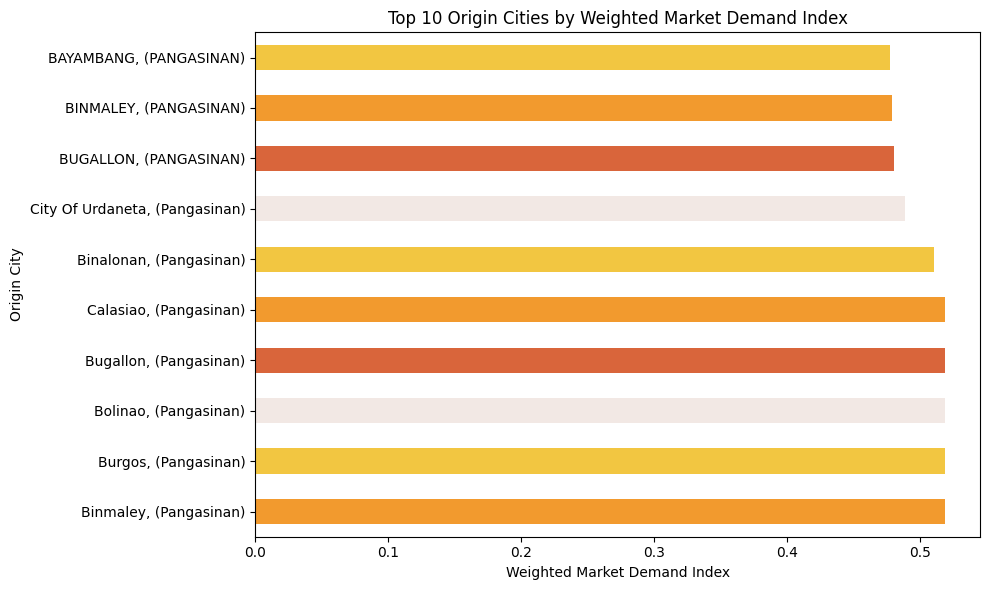

In [26]:
import matplotlib.pyplot as plt

# Group by 'major_country' and calculate the mean weighted demand index for each country
grouped_by_country = df.groupby('city_complete')['weighted_demand_index'].mean()

# Sort the countries by weighted demand index in descending order
sorted_countries = grouped_by_country.sort_values(ascending=False)

# Select the top N countries (e.g., top 10 countries)
top_n_countries = sorted_countries.head(10)

# Define the custom color palette
custom_colors = ['#F29A2E', '#F2C641', '#F2E8E4', '#D9653B']

# Create the horizontal bar plot with custom colors
plt.figure(figsize=(10, 6))
top_n_countries.plot(kind='barh', color=custom_colors * (len(top_n_countries) // len(custom_colors) + 1))

# Add labels and title
plt.title('Top 10 Origin Cities by Weighted Market Demand Index')
plt.xlabel('Weighted Market Demand Index')
plt.ylabel('Origin City')

# Show plot
plt.tight_layout()
plt.show()


# Weighted Market Demand Index by Origin Province

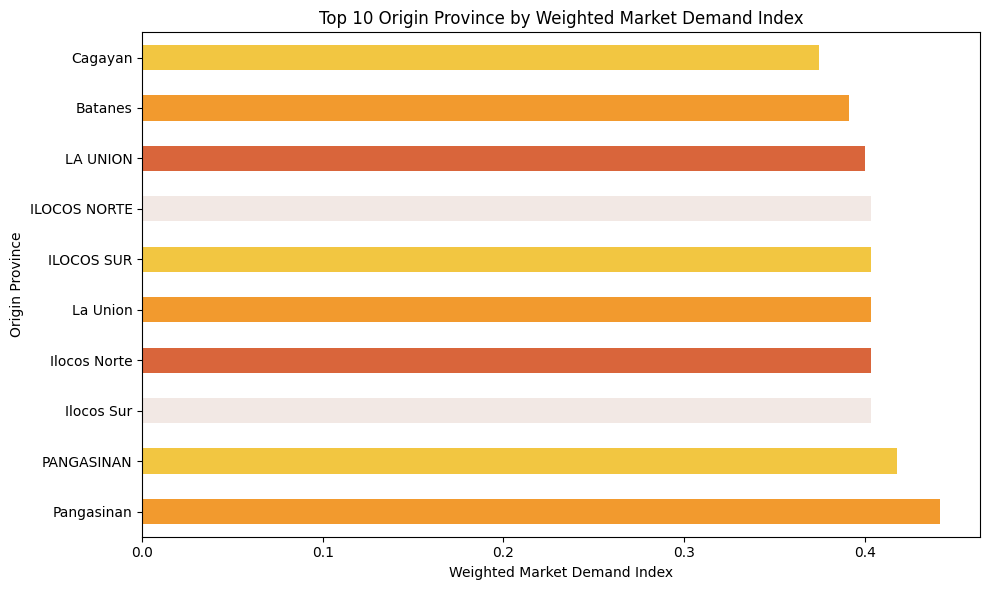

In [27]:
import matplotlib.pyplot as plt

# Group by 'major_country' and calculate the mean weighted demand index for each country
grouped_by_country = df.groupby('province')['weighted_demand_index'].mean()

# Sort the countries by weighted demand index in descending order
sorted_countries = grouped_by_country.sort_values(ascending=False)

# Select the top N countries (e.g., top 10 countries)
top_n_countries = sorted_countries.head(10)

# Define the custom color palette
custom_colors = ['#F29A2E', '#F2C641', '#F2E8E4', '#D9653B']

# Create the horizontal bar plot with custom colors
plt.figure(figsize=(10, 6))
top_n_countries.plot(kind='barh', color=custom_colors * (len(top_n_countries) // len(custom_colors) + 1))

# Add labels and title
plt.title('Top 10 Origin Province by Weighted Market Demand Index')
plt.xlabel('Weighted Market Demand Index')
plt.ylabel('Origin Province')

# Show plot
plt.tight_layout()
plt.show()


# Weighted Market Demand Index by Destination Country

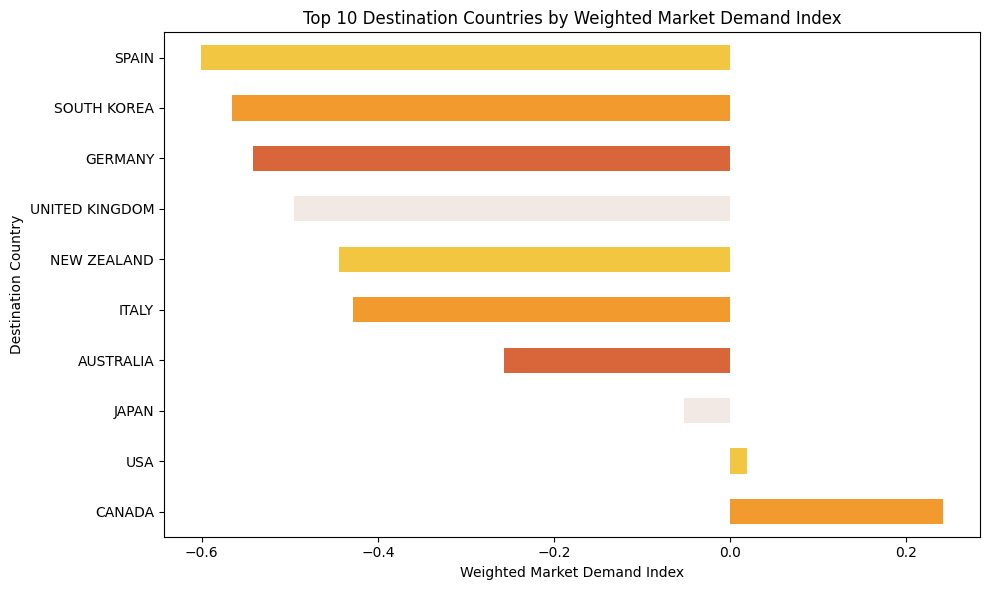

In [28]:
import matplotlib.pyplot as plt

# Group by 'major_country' and calculate the mean weighted demand index for each country
grouped_by_country = df.groupby('major_country')['weighted_demand_index'].mean()

# Sort the countries by weighted demand index in descending order
sorted_countries = grouped_by_country.sort_values(ascending=False)

# Select the top N countries (e.g., top 10 countries)
top_n_countries = sorted_countries.head(10)

# Define the custom color palette
custom_colors = ['#F29A2E', '#F2C641', '#F2E8E4', '#D9653B']

# Create the horizontal bar plot with custom colors
plt.figure(figsize=(10, 6))
top_n_countries.plot(kind='barh', color=custom_colors * (len(top_n_countries) // len(custom_colors) + 1))

# Add labels and title
plt.title('Top 10 Destination Countries by Weighted Market Demand Index')
plt.xlabel('Weighted Market Demand Index')
plt.ylabel('Destination Country')

# Show plot
plt.tight_layout()
plt.show()


# Education Support Index

### Education Support Index could be a measure of how well educational systems and resources are aligned to prepare Filipino emigrants for specific overseas markets and industries that require their skills. 

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler



# Revised custom mappings for educ_status with uniform distribution
educ_status_mapping = {
    'Not of Schooling Age': 0.0,          # Lowest value
    'No Formal Education': 0.1,
    'Elementary Level': 0.2,
    'Elementary Graduate': 0.3,
    'High School Level': 0.4,
    'High School Graduate': 0.5,
    'Vocational Level': 0.6,
    'Vocational Graduate': 0.7,
    'College Level': 0.8,
    'College Graduate': 0.85,
    'Post Graduate Level': 0.9,
    'Post Graduate': 1.0,                 # Highest value
    'Non-Formal Education ': 0.45,
    'Not Reported / No Response': 0.1     # Treated similarly to 'No Formal Education'
}


# Revised custom mappings for age_group with '30-34' having the highest value (1.0)
age_mapping = {
    '14 - Below': 0.1,     # Lower values for younger age groups
    '15 - 19': 0.2,
    '20 - 24': 0.3,
    '25 - 29': 0.8,        # Higher value approaching '30-34'
    '30 - 34': 1.0,        # Highest value
    '35 - 39': 0.9,        # Decreasing from '30-34'
    '40 - 44': 0.8,
    '45 - 49': 0.7,
    '50 - 54': 0.6,
    '55 - 59': 0.5,
    '60 - 64': 0.4,
    '65 - 69': 0.3,
    '70 - Above': 0.2,
    'No Response': 0.5     # Neutral value for no response
}


# Revised custom mappings for job_class with "Prof'l, Tech'l, & Related Workers" having 1.0
job_class_mapping = {
    "Prof'l, Tech'l, & Related Workers": 1.0,  # Highest value
    'Managerial, Executive, and Administrative Workers': 0.9,
    'Clerical Workers': 0.8,
    'Sales Workers': 0.7,
    'Service Workers': 0.6,
    'Agri, Animal Husbandry, Forestry Workers & Fishermen': 0.5,
    'Production Process, Transport Equipment Operators, & Laborers': 0.4,
    'Members of the Armed Forces': 0.3,
    'Housewives': 0.2,
    'Retirees': 0.1,
    'Students': 0.5,  # Adjusted to a mid-level value
    'Minors (Below 7 years old)': 0.05,  # Low value for minors
    'Out of School Youth': 0.05,  # Low value for out of school youth
    'No Occupation Reported': 0.5  # Neutral value for no occupation reported
}


# Apply the custom mappings
df['educ_status_custom'] = df['educ_status'].map(educ_status_mapping)
df['age_group_custom'] = df['age_group'].map(age_mapping)
df['job_class_custom'] = df['job_class'].map(job_class_mapping)

# Define the features to include in the Education Support Index
features = ['educ_status_custom', 'age_group_custom', 'job_class_custom']

# Optionally, standardize additional features if you want to
# scaler = StandardScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Assign equal weights to each feature (or customize weights)
num_features = len(features)
equal_weight = 1 / num_features  # Equal weights for simplicity
weights = {feature: equal_weight for feature in features}

# Calculate the Education Support Index
df['education_support_index'] = df.apply(
    lambda row: sum(row[col] * weights[col] for col in weights.keys()), axis=1
)

# Display the resulting Education Support Index
df[['educ_status', 'age_group', 'job_class', 'education_support_index']].head()


,educ_status,age_group,job_class,education_support_index
0,Not of Schooling Age,14 - Below,"Prof'l, Tech'l, & Related Workers",0.366667
1,Not of Schooling Age,14 - Below,"Prof'l, Tech'l, & Related Workers",0.366667
2,Not of Schooling Age,14 - Below,"Prof'l, Tech'l, & Related Workers",0.366667
3,Not of Schooling Age,14 - Below,"Prof'l, Tech'l, & Related Workers",0.366667
4,Not of Schooling Age,14 - Below,"Prof'l, Tech'l, & Related Workers",0.366667


In [30]:
print(df.columns)


Index(['year', 'gender', 'major_country', 'civil_status', 'age_group',
       'educ_status', 'occupation_group', 'job_class', 'region', 'province',
       'city_complete', 'age_group_encoded', 'educ_status_encoded',
       'job_class_encoded', 'occupation_group_encoded', 'gender_encoded',
       'major_country_encoded', 'civil_status_encoded', 'region_encoded',
       'province_encoded', 'city_complete_encoded', 'weighted_demand_index',
       'educ_status_custom', 'age_group_custom', 'job_class_custom',
       'education_support_index'],
      dtype='object')


# Least Education Support Index by Origin City

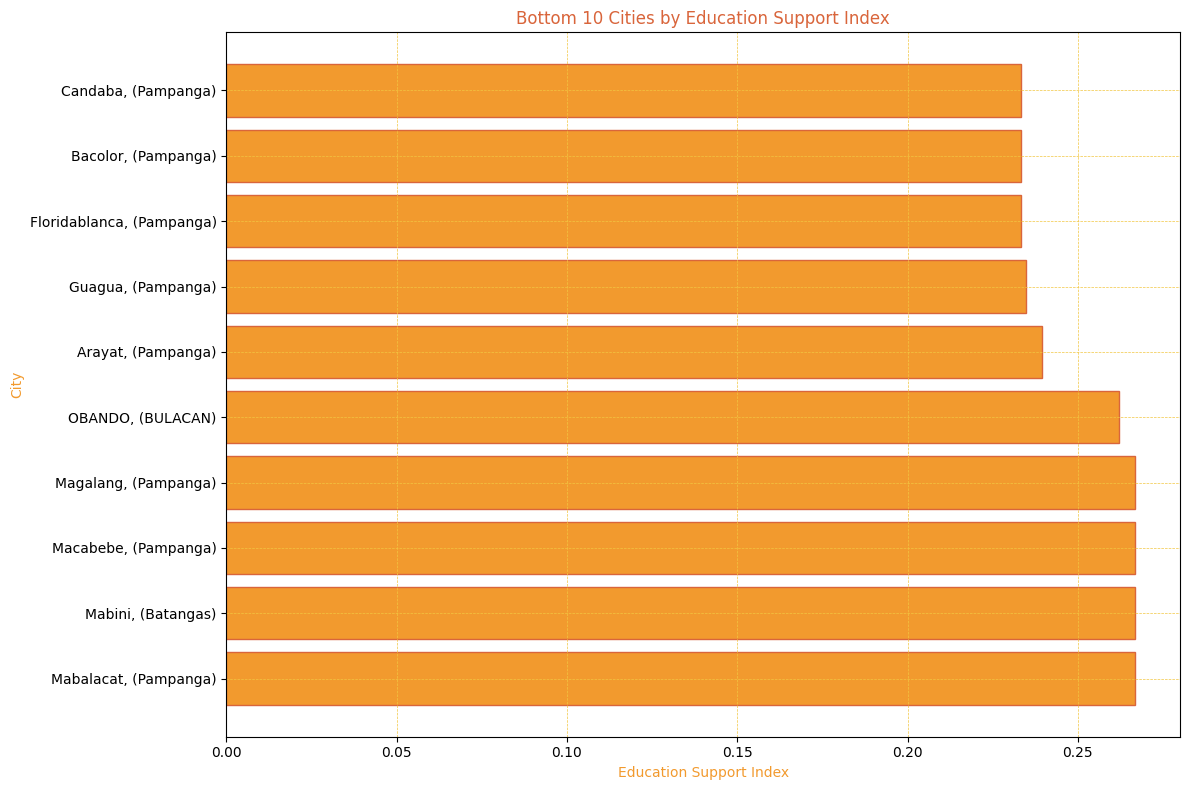

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'city_complete' and 'education_support_index'

# Group by 'city_complete' and calculate the average Education Support Index per city
city_support_index = df.groupby('city_complete')['education_support_index'].mean().reset_index()

# Sort by Education Support Index to get the bottom 10 cities
bottom_10_cities = city_support_index.sort_values(by='education_support_index', ascending=True).head(10)

# Plot a horizontal bar chart to visualize the Education Support Index for the bottom 10 cities
plt.figure(figsize=(12, 8))
plt.barh(bottom_10_cities['city_complete'], bottom_10_cities['education_support_index'], color='#F29A2E', edgecolor='#D9653B')

# Apply the custom color theme
plt.title('Bottom 10 Cities by Education Support Index', color='#D9653B')
plt.xlabel('Education Support Index', color='#F29A2E')
plt.ylabel('City', color='#F29A2E')

# Set grid color with white background
plt.grid(True, color='#F2C641', linestyle='--', linewidth=0.5)

# Invert y-axis so the lowest index is at the top
plt.gca().invert_yaxis()

# Apply tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# Least Education Support Index by Province

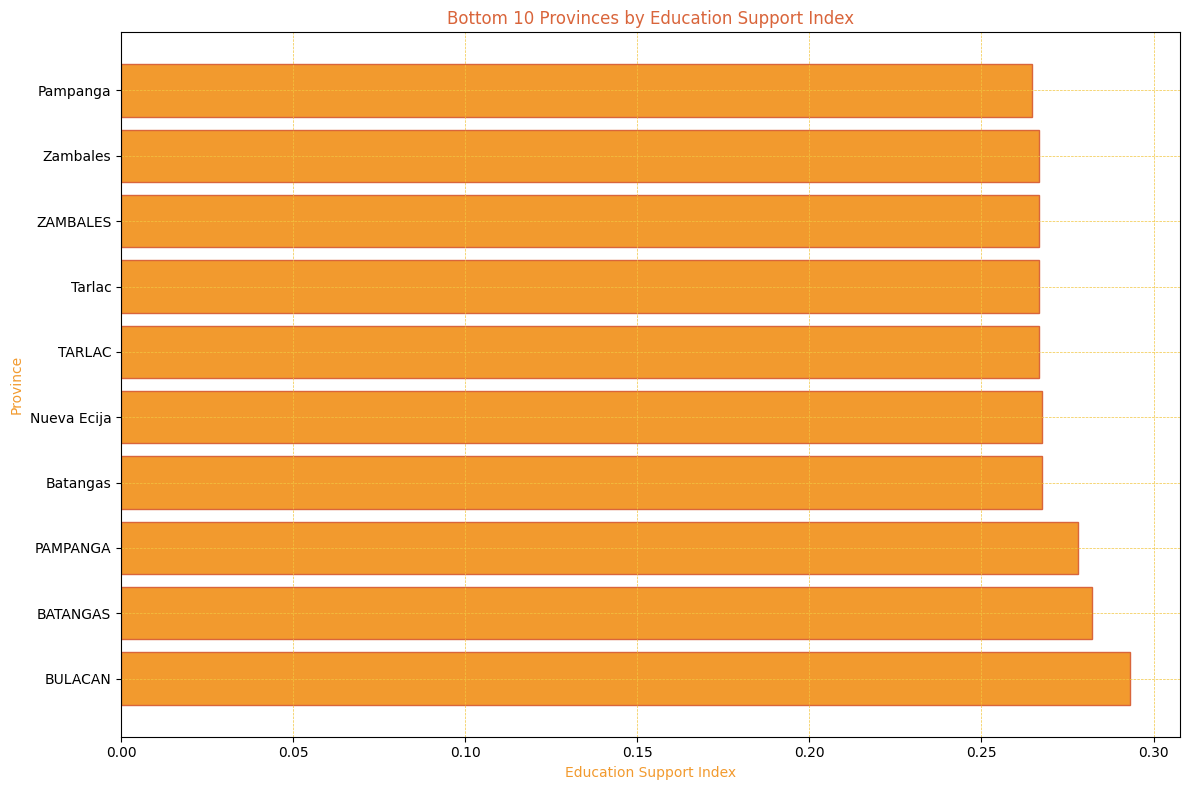

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by 'province' and calculate the average Education Support Index per province
province_support_index = df.groupby('province')['education_support_index'].mean().reset_index()

# Sort by Education Support Index to get the bottom 10 provinces
bottom_10_provinces = province_support_index.sort_values(by='education_support_index', ascending=True).head(10)

# Plot a horizontal bar chart to visualize the Education Support Index for the bottom 10 provinces
plt.figure(figsize=(12, 8))
plt.barh(bottom_10_provinces['province'], bottom_10_provinces['education_support_index'], color='#F29A2E', edgecolor='#D9653B')

# Apply the custom color theme
plt.title('Bottom 10 Provinces by Education Support Index', color='#D9653B')
plt.xlabel('Education Support Index', color='#F29A2E')
plt.ylabel('Province', color='#F29A2E')

# Set grid color with white background
plt.grid(True, color='#F2C641', linestyle='--', linewidth=0.5)

# Invert y-axis so the lowest index is at the top
plt.gca().invert_yaxis()

# Apply tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# Least Education Support Index by Region

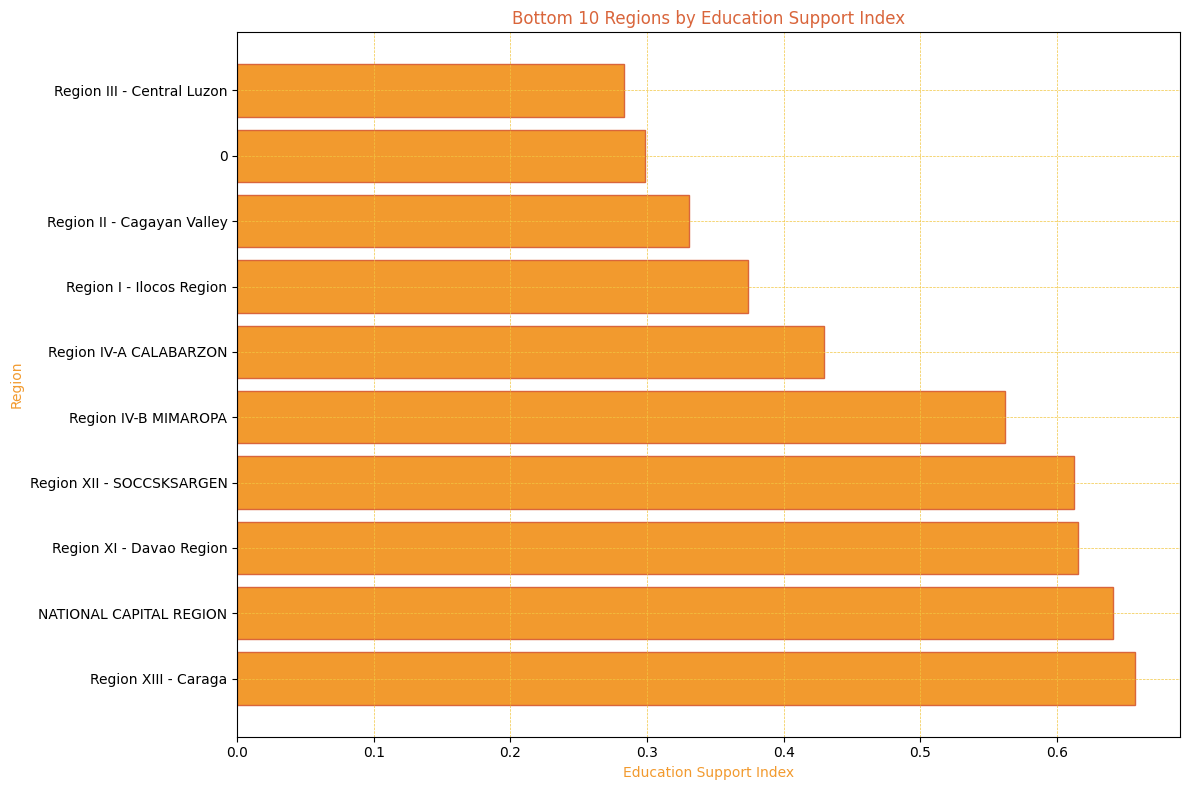

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by 'region' and calculate the average Education Support Index per region
region_support_index = df.groupby('region')['education_support_index'].mean().reset_index()

# Sort by Education Support Index to get the bottom 10 regions
bottom_10_regions = region_support_index.sort_values(by='education_support_index', ascending=True).head(10)

# Plot a horizontal bar chart to visualize the Education Support Index for the bottom 10 regions
plt.figure(figsize=(12, 8))
plt.barh(bottom_10_regions['region'], bottom_10_regions['education_support_index'], color='#F29A2E', edgecolor='#D9653B')

# Apply the custom color theme
plt.title('Bottom 10 Regions by Education Support Index', color='#D9653B')
plt.xlabel('Education Support Index', color='#F29A2E')
plt.ylabel('Region', color='#F29A2E')

# Set grid color with white background
plt.grid(True, color='#F2C641', linestyle='--', linewidth=0.5)

# Invert y-axis so the lowest index is at the top
plt.gca().invert_yaxis()

# Apply tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# Split data into features and target variable

In [34]:
# Import required libraries
from sklearn.model_selection import train_test_split


X = df[['gender_encoded', 'major_country_encoded', 'civil_status_encoded', 'age_group_encoded', 'educ_status_encoded',
        'occupation_group_encoded', 'job_class_encoded', 'region_encoded', 'province_encoded', 'city_complete_encoded']]

# Set the newly created demand index as the target variable
y = df['weighted_demand_index']  # Or use 'demand_index' for simple sum


# Split the data into train and test sets using the last 20% as test data
split_ratio = 0.8  # 80% train, 20% test
split_index = int(len(df) * split_ratio)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (258975, 10) (258975,)
Test set: (64744, 10) (64744,)


# Correlation of Features

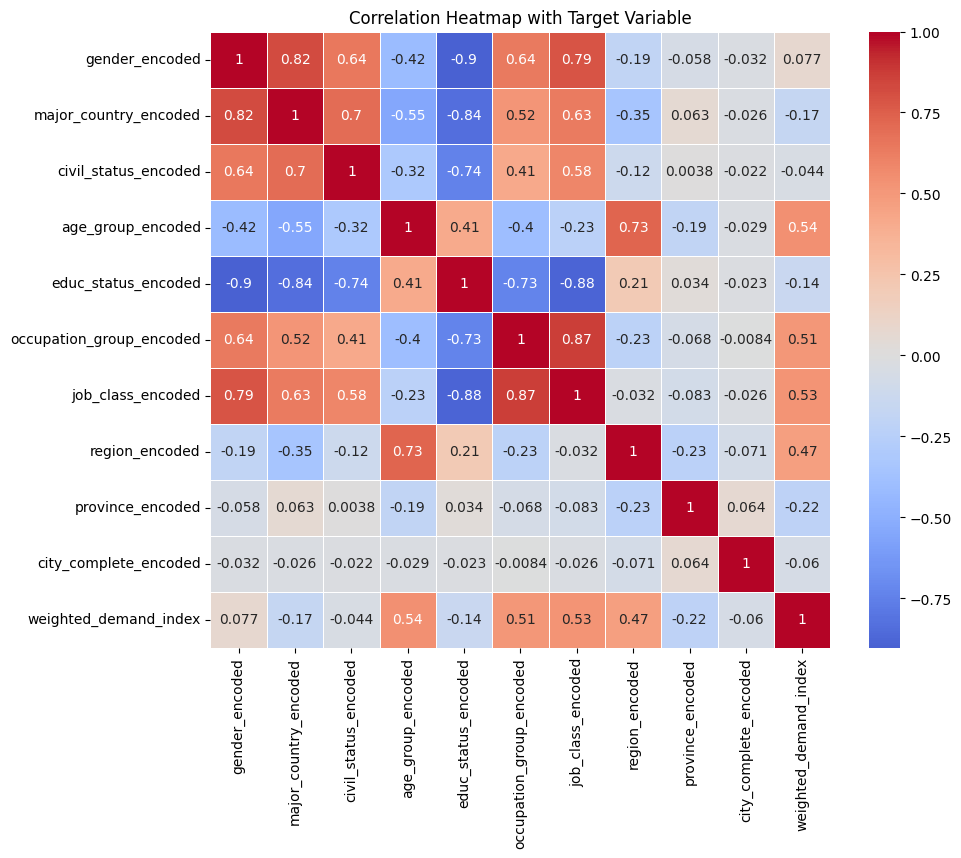

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Step 2: Create a new DataFrame that combines X (features) and y (target)
df_corr = pd.concat([X, y], axis=1)

# Step 3: Compute the correlation matrix
correlation_matrix = df_corr.corr()

# Step 4: Plot the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, center=0)

# Customize the heatmap
plt.title('Correlation Heatmap with Target Variable')
plt.show()


# Modelling

## LSTM (Long Short-Term Memory Network)
### LSTM networks are great for predicting demand for Filipino Emigrant Support Services because they can remember important patterns over time, handle changes in demand, and work well with complex or incomplete data.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined

# Scale the data for LSTM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input data to be 3D [samples, time steps, features]
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and save the training history
history = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test_lstm, y_test))

# Make predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)



Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8093/8093 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 0.0036 - val_loss: 7.3015e-06
Epoch 2/20
8093/8093 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 7.7822e-06 - val_loss: 9.4477e-06
Epoch 3/20
8093/8093 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 5.3812e-06 - val_loss: 2.9156e-06
Epoch 4/20
8093/8093 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 3.8250e-06 - val_loss: 1.7049e-06
Epoch 5/20
8093/8093 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 2.7463e-06 - val_loss: 2.3088e-06
Epoch 6/20
8093/8093 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 3.3702e-06 - val_loss: 4.2199e-06
Epoch 7/20
8093/8093 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 4.0987e-06 - val_loss: 1.9639e-05
Epoch 8/20
8093/8093 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 3.3071e-06 - val_loss: 1.5396e-06
Epoch 9/20
8093/8093 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 2.4046e-06 - val_loss: 1.1488e-05
Epoch 10/20
8093/8093 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 2.0766e-06 - val_loss: 1.7826e-06
Epoch 11/20
8093/8093 ━━━━━━━━━━━━━━━━━━━━ 2

LSTM RMSE: 0.0012509236441693038


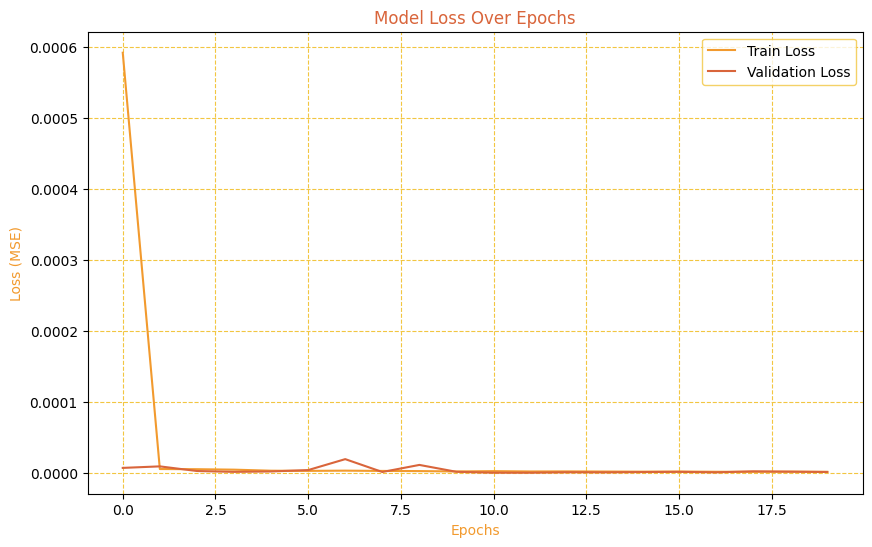

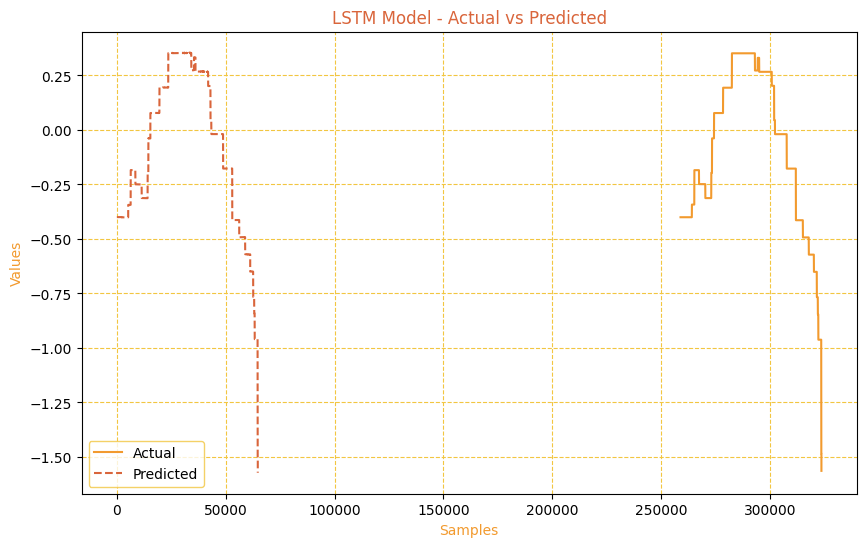

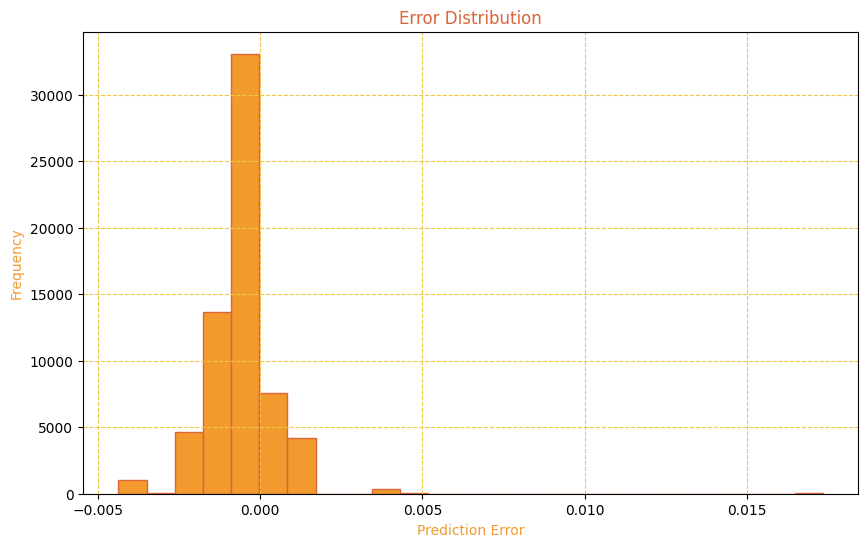

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Evaluate the model
rmse_lstm = mean_squared_error(y_test, y_pred_lstm, squared=False)
print(f"LSTM RMSE: {rmse_lstm}")

# 1. Plot Training Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='#F29A2E')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#D9653B')
plt.title('Model Loss Over Epochs', color='#D9653B')
plt.xlabel('Epochs', color='#F29A2E')
plt.ylabel('Loss (MSE)', color='#F29A2E')
plt.legend(facecolor='white', edgecolor='#F2C641')  # White background for the legend
plt.grid(True, linestyle='--', color='#F2C641')
plt.gca().set_facecolor('white')  # Set plot background to white
plt.show()

# 2. Plot Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='#F29A2E', linestyle='-')
plt.plot(y_pred_lstm, label='Predicted', color='#D9653B', linestyle='--')
plt.title('LSTM Model - Actual vs Predicted', color='#D9653B')
plt.xlabel('Samples', color='#F29A2E')
plt.ylabel('Values', color='#F29A2E')
plt.legend(facecolor='white', edgecolor='#F2C641')  # White background for the legend
plt.grid(True, linestyle='--', color='#F2C641')
plt.gca().set_facecolor('white')  # Set plot background to white
plt.show()

# 3. Plot Error Distribution
errors = y_test - y_pred_lstm.reshape(-1)  # Calculate the residuals/errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25, color='#F29A2E', edgecolor='#D9653B')
plt.title('Error Distribution', color='#D9653B')
plt.xlabel('Prediction Error', color='#F29A2E')
plt.ylabel('Frequency', color='#F29A2E')
plt.grid(True, linestyle='--', color='#F2C641')
plt.gca().set_facecolor('white')  # Set plot background to white
plt.show()


### Interpretation
### The RMSE (Root Mean Squared Error) of 0.000899 tells us how close the predictions made by our LSTM model are to the actual values. In simple terms, the smaller this number, the more accurate the model is.
### Since 0.000899 is a very small number, it means that the difference between what the model predicts and the actual results is tiny. This shows that the model is doing an excellent job at making predictions.



# LSTM: Predicted vs Actual Values By Major Country

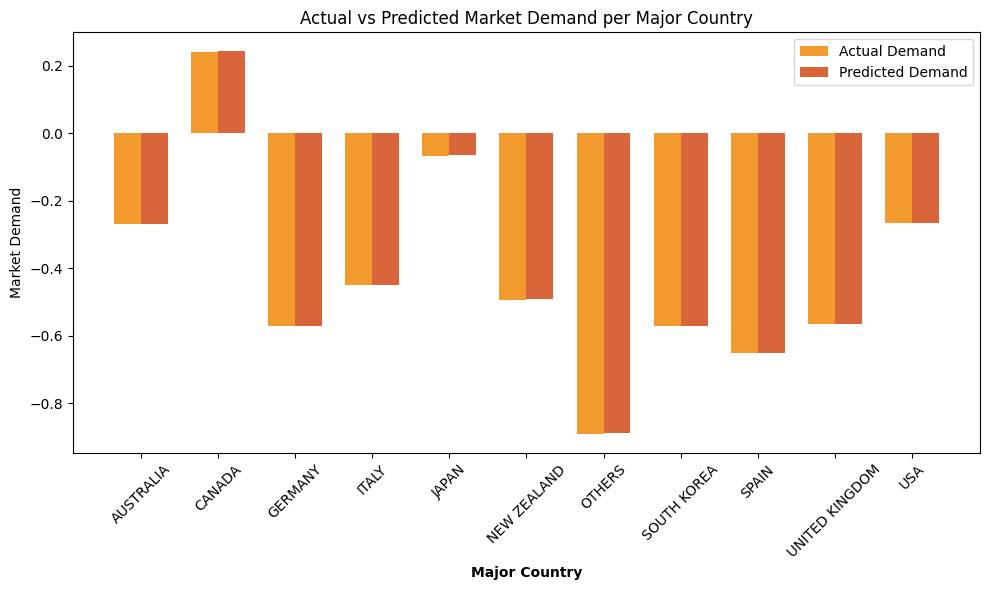

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_lstm are arrays, and you have 'major_country_encoded' as part of X_test

# Convert y_test and y_pred_lstm to NumPy arrays (if they are pandas Series)
y_test_flat = y_test.to_numpy()
y_pred_flat = y_pred_lstm.flatten()  # y_pred_lstm is usually a NumPy array from the LSTM, so flatten it

# Assuming X_test is a DataFrame and has 'major_country_encoded' column
major_country_encoded_test = X_test['major_country_encoded']  # Ensure this matches the test set

# Create a DataFrame to compare actual and predicted values along with major_country_encoded
comparison_df = pd.DataFrame({
    'major_country_encoded': major_country_encoded_test.values,  # Convert to NumPy array if needed
    'actual': y_test_flat,
    'predicted': y_pred_flat
})

# Group by 'major_country_encoded' to aggregate the actual and predicted values
grouped_df = comparison_df.groupby('major_country_encoded').mean().reset_index()

# Define the mapping between major_country_encoded and the original country names
# Example mapping; you should replace this with your actual mapping
major_country_mapping = {
    10: 'USA',
    1: 'CANADA',
    4: 'JAPAN',
    0: 'AUSTRALIA',
    3: 'ITALY',
    5: 'NEW ZEALAND',
    9: 'UNITED KINGDOM',
    2: 'GERMANY',
    7: 'SOUTH KOREA',
    8: 'SPAIN',
    6: 'OTHERS'

    # Add more mappings as necessary
}

# Map encoded values back to original country names
grouped_df['major_country_original'] = grouped_df['major_country_encoded'].map(major_country_mapping)

# Set the width for the bars
bar_width = 0.35

# Define the positions for the bars
r1 = np.arange(len(grouped_df))
r2 = [x + bar_width for x in r1]

# Create bar graph for Actual and Predicted values with original country names on x-axis
plt.figure(figsize=(10, 6))
plt.bar(r1, grouped_df['actual'], color='#F29A2E', width=bar_width, label='Actual Demand')
plt.bar(r2, grouped_df['predicted'], color='#D9653B', width=bar_width, label='Predicted Demand')

# Add labels and title with a simpler format
plt.xlabel('Major Country', fontweight='bold')
plt.ylabel('Market Demand')
plt.title('Actual vs Predicted Market Demand per Major Country')

# Customize x-axis labels with the original country names
plt.xticks([r + bar_width / 2 for r in range(len(grouped_df))], grouped_df['major_country_original'], rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# XGBoost (Extreme Gradient Boosting)

In [39]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Convert the dataset into DMatrix format (optional but recommended for large datasets)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                          colsample_bytree=0.3, 
                          learning_rate=0.1,
                          max_depth=5, 
                          alpha=10, 
                          n_estimators=100)

# Train the model
xg_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg_reg.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")



Mean Squared Error: 0.004301926725907163
R² Score: 0.9642736143494643


### These metrics indicate that the model is performing well:
### The MSE of 0.0030 suggests that the model's predictions are very close to the actual values.
### The R² score of 0.975 means the model can explain most of the variability in the target, which is a good sign of its predictive power.

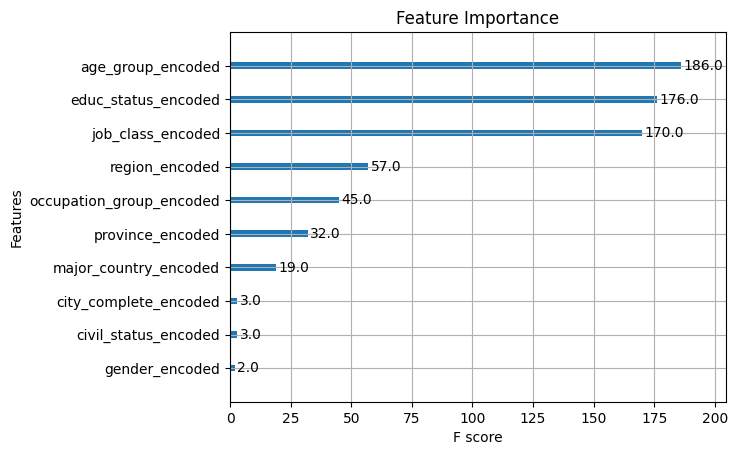

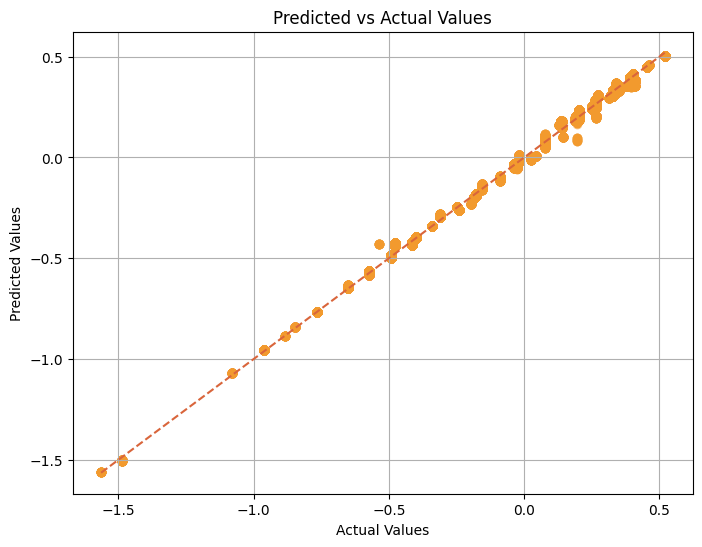

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


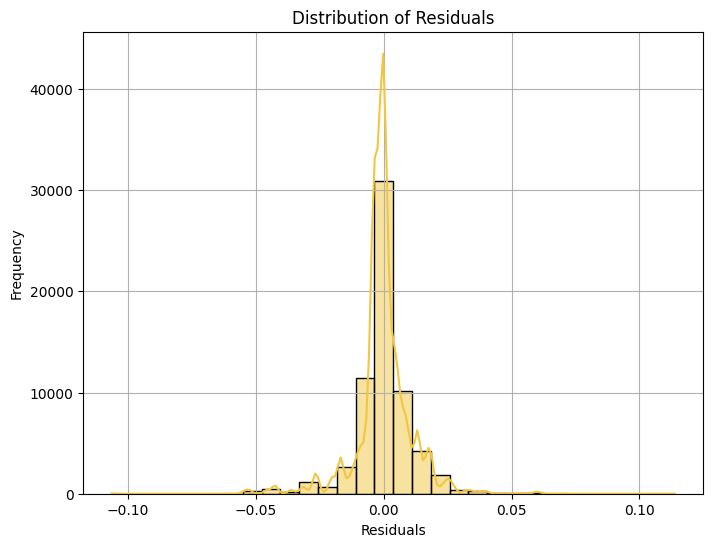

In [40]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y are your features and target
# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
xg_reg.fit(X_train, y_train)

# Predict the values
y_pred = xg_reg.predict(X_test)

# Custom color palette based on provided colors and white background
color_scatter = '#F29A2E'  # For scatter points
color_line = '#D9653B'     # For reference line
color_residual = '#F2C641' # For residuals histogram
background_color = 'white' # White background for plots

# 1. Feature Importance Plot with white background and custom color theme
xgb.plot_importance(xg_reg)
plt.title('Feature Importance')
plt.gca().set_facecolor(background_color)
plt.grid(True)
plt.show()

# 2. Predicted vs Actual Values with custom colors and white background
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color=color_scatter)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color=color_line, linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.grid(True)
plt.gca().set_facecolor(background_color)
plt.show()

# 3. Residuals Distribution with custom colors and white background
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color=color_residual, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.gca().set_facecolor(background_color)
plt.show()


In [41]:
## Insights:
### Based on simulated weighted demand index:
#### Filipino support services is the most in-demand in Canada next to USA.
#### Migrants originating from Pangasinan has the highest demand index.

### Based on simulated education support index:
#### Region III Central Luzon has the lowest education support index, govt/private orgs can focus efforts on providing support to aspiring migrants originating from here
